In [22]:
import pandas as pd
import numpy as np
!pip install pmdarima

In [23]:
df=pd.read_csv('Hourly.csv', index_col='_time', parse_dates=True)
df.head()
print('Shape of Data: ', df.shape)

Shape of Data:  (169, 1)


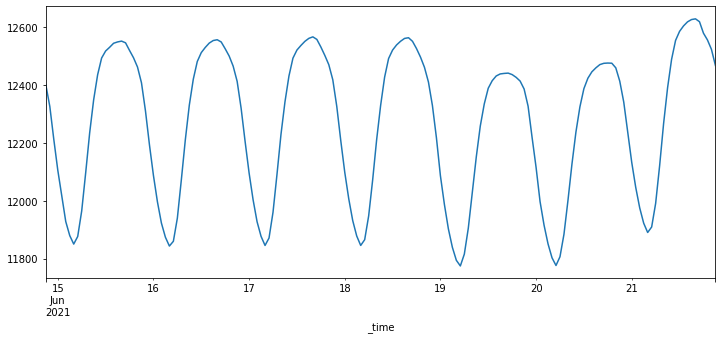

In [24]:
df['IP_Sessions(K)'].plot(figsize=(12,5))

In [25]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [26]:
ad_test(df['IP_Sessions(K)'])

1. ADF :  -1.8015419816992715
2. P-Value :  0.3796964116762262
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression: 154
5. Critical Values :
	 1% :  -3.473542528196209
	 5% :  -2.880497674144038
	 10% :  -2.576878053634677


In [27]:
from pmdarima import auto_arima
import warnings 
warnings.filterwarnings("ignore")

In [28]:
stepwise_fit = auto_arima(df['IP_Sessions(K)'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1388.740, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2361.100, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1930.456, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3663.882, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1597.341, Time=0.49 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1411.445, Time=0.42 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1386.616, Time=0.66 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1391.022, Time=0.59 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=1399.891, Time=0.62 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1385.971, Time=0.61 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1384.978, Time=0.56 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1510.937, Time=0.58 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=1385.328, Time=0.60 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  169
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -685.489
Date:                Thu, 24 Jun 2021   AIC                           1384.978
Time:                        21:28:29   BIC                           1406.888
Sample:                             0   HQIC                          1393.870
                                - 169                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    824.3635    137.289      6.005      0.000     555.282    1093.445
ar.L1          1.8109      0.049     37.104      0.000       1.715       1.907
ar.L2         -0.8781      0.050    -17.690      0.000      -0.975      -0.781
ma.L1          0.7539      0.084      8.968      0.000       0.589       0.919
ma.L2          0.6307      0.107      5.898      0.000       0.421       0.840
ma.L3          0.2928      0.093      3.133      0.002       0.110       0.476
sigma2       184.7490     21.463      8.608      0.000     142.683     226.815
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.97
Prob(Q):                              0.83   Prob(JB):                         0.62
Heteroskedasticity (H):               1.02   Skew:                             0.17
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
print(df.shape)
train=df
test[0:24]
print(train.shape,test.shape)

(169, 1)
(169, 1) (24, 1)


In [33]:
model=ARIMA(train['IP_Sessions(K)'],order=(2,0,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:         IP_Sessions(K)   No. Observations:                  169
Model:                     ARMA(2, 3)   Log Likelihood                -684.084
Method:                       css-mle   S.D. of innovations             13.456
Date:                Thu, 24 Jun 2021   AIC                           1382.168
Time:                        21:28:55   BIC                           1404.077
Sample:                    06-14-2021   HQIC                          1391.059
                         - 06-21-2021                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.227e+04     32.453    377.953      0.000    1.22e+04    1.23e+04
ar.L1.IP_Sessions(K)     1.8028      0.042     42.534      0.000       1.720       1.886
ar.L2.IP_Sessions(K)    -0.8874      0.041    -21.505      0.000      -0.968      -0.807
ma.L1.IP_Sessions(K)     0.7484      0.081      9.250      0.000       0.590       0.907
ma.L2.IP_Sessions(K)     0.6307      0.146      4.323      0.000       0.345       0.917
ma.L3.IP_Sessions(K)     0.2946      0.150      1.958      0.050      -0.000       0.589
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0158           -0.3084j            1.0616           -0.0469
AR.2            1.0158           +0.3084j            1.0616            0.0469
MA.1           -0.1786           -1.3680j            1.3796           -0.2707
MA.2           -0.1786           +1.3680j            1.3796            0.2707
MA.3           -1.7836           -0.0000j            1.7836           -0.5000
-----------------------------------------------------------------------------
"""

In [37]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')

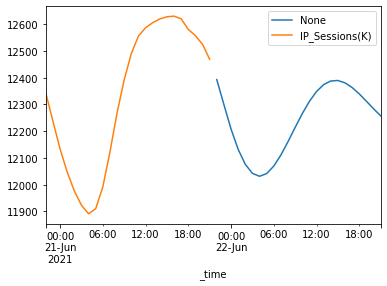

In [35]:
pred.plot(legend=True)
test['IP_Sessions(K)'].plot(legend=True)

In [38]:
pred

2021-06-21 22:00:00-04:00    12392.326374
2021-06-21 23:00:00-04:00    12298.942665
2021-06-22 00:00:00-04:00    12207.838173
2021-06-22 01:00:00-04:00    12131.886104
2021-06-22 02:00:00-04:00    12075.806790
2021-06-22 03:00:00-04:00    12042.107386
2021-06-22 04:00:00-04:00    12031.118978
2021-06-22 05:00:00-04:00    12041.213633
2021-06-22 06:00:00-04:00    12069.162778
2021-06-22 07:00:00-04:00    12110.590661
2021-06-22 08:00:00-04:00    12160.473802
2021-06-22 09:00:00-04:00    12213.639017
2021-06-22 10:00:00-04:00    12265.218009
2021-06-22 11:00:00-04:00    12311.024979
2021-06-22 12:00:00-04:00    12347.833943
2021-06-22 13:00:00-04:00    12373.543613
2021-06-22 14:00:00-04:00    12387.228536
2021-06-22 15:00:00-04:00    12389.084977
2021-06-22 16:00:00-04:00    12380.287986
2021-06-22 17:00:00-04:00    12362.781736
2021-06-22 18:00:00-04:00    12339.028393
2021-06-22 19:00:00-04:00    12311.741438
2021-06-22 20:00:00-04:00    12283.627764
2021-06-22 21:00:00-04:00    12257